Analyzing feature importance and using SHAP

In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from xgboost import XGBClassifier


In [3]:
# Load Model and Data
model = joblib.load('../app/model/model.pkl')
X_train = joblib.load('../app/model/X_train_scaled.pkl')
X_test = joblib.load('../app/model/X_test_scaled.pkl')
y_test = joblib.load('../app/model/y_test.pkl')

In [4]:
# Load raw column names if you saved them
try:
    feature_names = joblib.load('../app/model/feature_names.pkl')  # Save this during preprocessing if needed
except:
    feature_names = None

C:\Users\shree\AppData\Local\Temp\ipykernel_15008\3307575386.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')


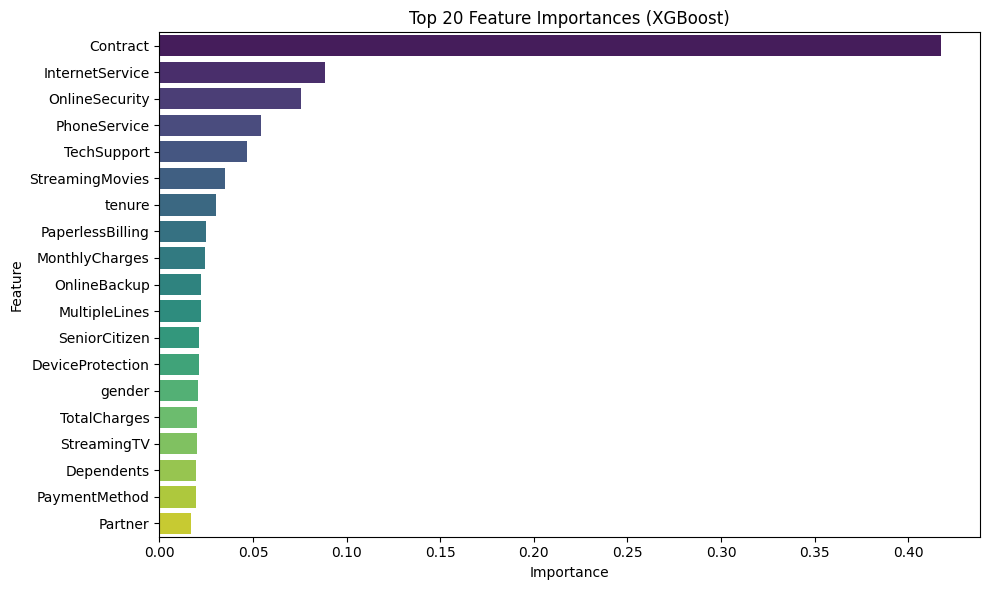

In [5]:
# Plot XGBoost Feature Importance
plt.figure(figsize=(10, 6))
importance_df = pd.DataFrame({
    'Feature': feature_names if feature_names else range(len(model.feature_importances_)),
    'Importance': model.feature_importances_
})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

In [6]:
# SHAP Explainability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

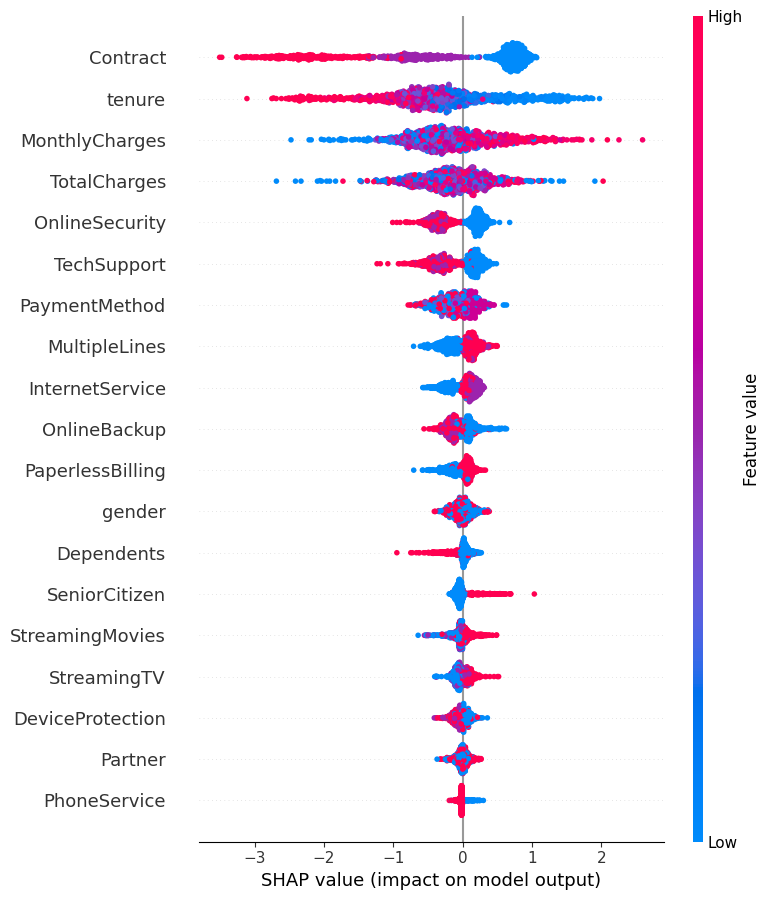

In [7]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)